In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from functionsMaths import calculateDelta, get_mse,gradiente_descendente, feedforward,div_tuplas, init_params_test
import os
import math
from statistics import mean

In [14]:
#Cantidad de letras por cada set
cantidad =['100','500','1000']

#Porcentajes datos de validacion
set_validation = [0.1,0.2,0.3]

#Cantidad de epocas
epocas = 20

test =[ [[5],0.5,0.5], [[10],0.5,0.5], [[5,5],0.5,0.5], [[10,10],0.5,0.5]]

In [15]:
#Arquitectura
W,B = init_params_test(test[2][0])
#Factor de aprendizaje
lr = np.array(test[2][1])
#Momento
m = np.array(test[2][2])

#Porcentaje de set de validacion
percentage = 0

#Seleccionamos el set
set =0

In [16]:
data = (pd.read_csv(os.path.join(os.path.abspath(''),"data","distorsionadas",cantidad[set],'letras.csv'),sep=';',header=None)).to_numpy()
#Convertimos el dataframe en array numpy
data_train = data[:int(len(data)-int(len(data)*set_validation[percentage])*2)]
data_validation = data[int(len(data)-int(len(data)*set_validation[percentage])*2):int(len(data)-int(len(data)*set_validation[percentage])*2)+int(len(data)*set_validation[percentage])]
data_test = data[int(len(data)-int(len(data)*set_validation[percentage])*2)+int(len(data)*set_validation[percentage]):]

#Division de datos en tuplas(datos,clase)
letras_train = div_tuplas(data_train)
letras_test = div_tuplas(data_train)
letras_validation = div_tuplas(data_validation)

In [17]:

err_train_epoc = []
err_valid_epoc = []

for epoc in range(epocas):
    err_training = np.array([0,0,0])
    err_validation = np.array([0,0,0])
    
    for i in range(len(letras_train)):
        
        #TRAINING
        Y = feedforward(letras_train[i][0],W,B,len(test[2][0])+2)
        Ye = np.array(letras_train[i][1])
        err_training = err_training + ((Ye-Y[-1])**2)

        #Deltas
        deltas = calculateDelta(Y[-1],Ye,W[1:])

        W,B = gradiente_descendente(W,B,deltas,Y[0:3],lr,m)

    #VALIDATION
    for i in range(len(letras_validation)):
        Y = feedforward(letras_validation[i][0],W,B,len(test[2][0])+2)
        Ye = np.array(letras_validation[i][1])
        err_validation = err_validation + ((Ye-Y[-1])**2)

    err_train_epoc.append(get_mse(np.mean(err_training),len(letras_train)))
    err_valid_epoc.append(get_mse(np.mean(err_validation),len(letras_validation)))


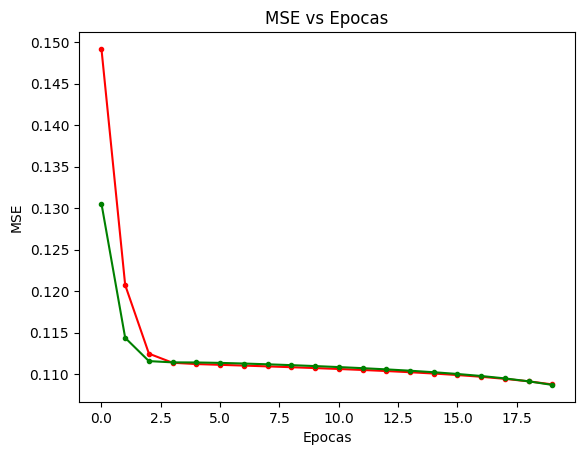

In [18]:
err_train_epoc = np.array(err_train_epoc)
err_valid_epoc = np.array(err_valid_epoc)
x = np.array([i for i in range(epocas)])
plt.plot(x,err_train_epoc, linestyle='-', marker='.', color = 'r')
plt.plot(x,err_valid_epoc,linestyle='-', marker='.', color = 'g')
plt.title('MSE vs Epocas')
plt.xlabel('Epocas')
plt.ylabel('MSE')
plt.show()

In [12]:

# ## PREDICT 
# letra = ["b","d","f"]
# porcentaje = 0
# for i in range(len(letras_test)):
#     ys1 =[]
#     z1 = []
#     for j in range(len(W1)):
#                 #Suma ponderada
#         Z1 = np.dot(letras_test[i][0],W1[j])
#                 #Funcion de activacion
#         ys1.append(lineal(Z1+b1[j]))
#         z1.append(Z1)
                
#     z1 = np.array(z1)
#     ys1 = np.array(ys1)

#     #print("Primer capa: ", ys1)
#     #Segunda capa
#     ys2 = []
#     z2 = []
#     for j in range(len(W2)):
#         #Suma ponderada
#         Z2 = np.dot(ys1,W2[j])
#         #Funcion de activacion
#         ys2.append(lineal(Z2+b2[j]))
#         z2.append(Z2)
                
#     z2 = np.array(z2)
#     ys2 = np.array(ys2)

#     #print("2da capa: ", ys2)
#     #Capa de salida
#     ys3 = []
#     z3 = []
#     for j in range(len(W3)):
#         #Suma ponderada
#         Z3 = np.dot(ys2,W3[j])
#         #Funcion de activacion
#         ys3.append(sigmoide(Z3+b3[j]))
#         z3.append(Z3)
#                 #print("Capa salida: ", ys3)
#                 #!!-----Calculo del error-----!!!

#     ys3 = np.array(ys3)
#     z3 = np.array(z3)

#     if(np.argmax(ys3) == np.argmax(letras_test[i][1])):
#         porcentaje += 1
#     print("Prediccion: {} letra: {} ---- valor real: {}, letra: {}".format( np.argmax(ys3)+1,letra[ np.argmax(ys3)],np.argmax(letras_test[i][1])+1,letra[np.argmax(letras_test[i][1])] ))
# print("Porcentaje predicho: {}%".format((porcentaje/len(letras_test))*100))

Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 2 letra: d ---- valor real: 2, letra: d
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 2 letra: d ---- valor real: 2, letra: d
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 2 letra: d ---- valor real: 2, letra: d
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 2 letra: d ---- valor real: 2, letra: d
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 1 letra: b ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 2 letra: d ---- valor real: 2, letra: d
Prediccion: 